Predicting the outcome of the drugs that might be accurate for a patient

Data Preprocessing

In [2]:
#1. Preprocess data by applying all concepts covered including
#  -dealing with empty values
#  -Handling categorical and non-numeric values(use any type of encoding)
#  -Generate few plots; bar and pie plots using any features but should include both single and multivariate plots.

#2. drop one feature if two features have a correlation greater than 0.9


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("C:/Users/Ethel Enam Nyamador/Desktop/WACCBIP/Assignments/2/Drug_data.csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder 

In [8]:
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['BP'] = encoder.fit_transform(data['BP'])
data['Drug'] = encoder.fit_transform(data['Drug'])
data['Cholesterol'] = encoder.fit_transform(data['Cholesterol'])
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [9]:
data.describe

<bound method NDFrame.describe of      Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    0   0            0   25.355     0
1     47    1   1            0   13.093     3
2     47    1   1            0   10.114     3
3     28    0   2            0    7.798     4
4     61    0   1            0   18.043     0
..   ...  ...  ..          ...      ...   ...
195   56    0   1            0   11.567     3
196   16    1   1            0   12.006     3
197   52    1   2            0    9.894     4
198   23    1   2            1   14.020     4
199   40    0   1            1   11.349     4

[200 rows x 6 columns]>

In [10]:
data.shape

(200, 6)

Text(0.5, 1.0, 'A bar plot of single plot')

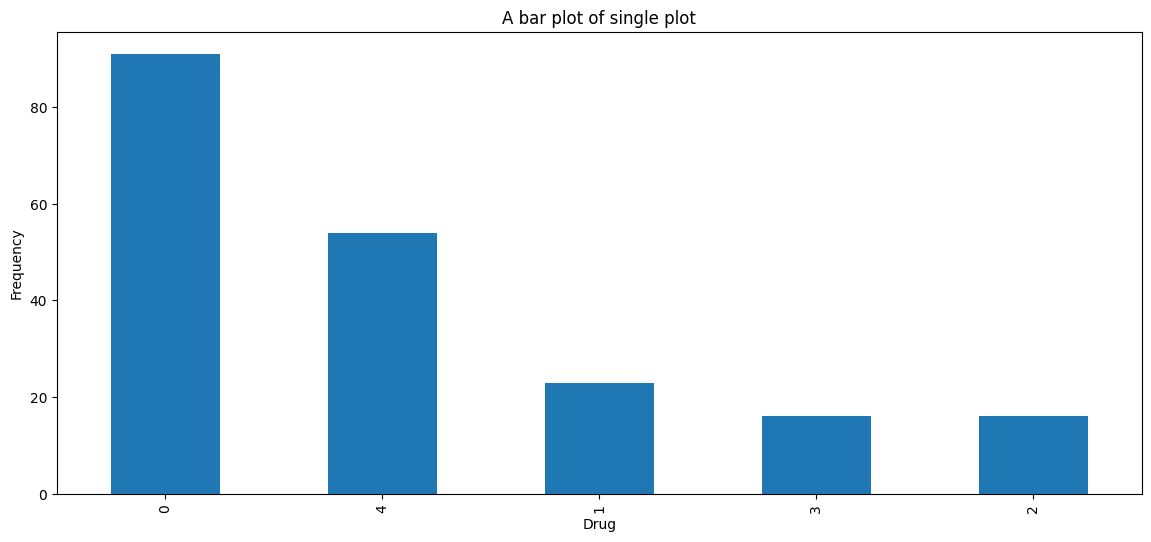

In [11]:
bar1 = data['Drug'].value_counts().plot(kind='bar', figsize=(14,6))
bar1.set_ylabel('Frequency')
bar1.set_xlabel('Drug')
bar1.set_title('A bar plot of single plot')

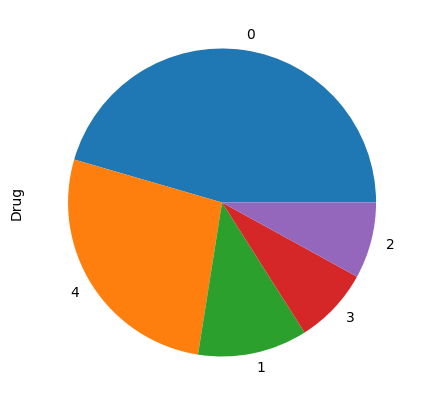

In [12]:
pie1 = data['Drug'].value_counts().plot(kind='pie', figsize=(5,5))

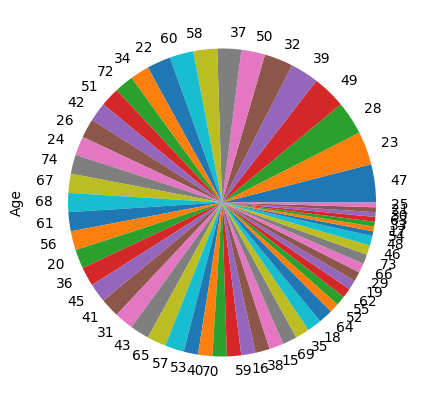

In [13]:
pie1 = data['Age'].value_counts().plot(kind='pie', figsize=(5,5))

In [14]:
corr = data.corr()
corr

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


Model building

In [15]:
#Split data into target feature and independent features(check meta-data)
from sklearn.model_selection import train_test_split
y = data['Drug']
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]

In [16]:
#train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
random_state = 49)

In [17]:
# perform Feature Scaling using codes below
from sklearn.preprocessing import StandardScaler  #import library
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

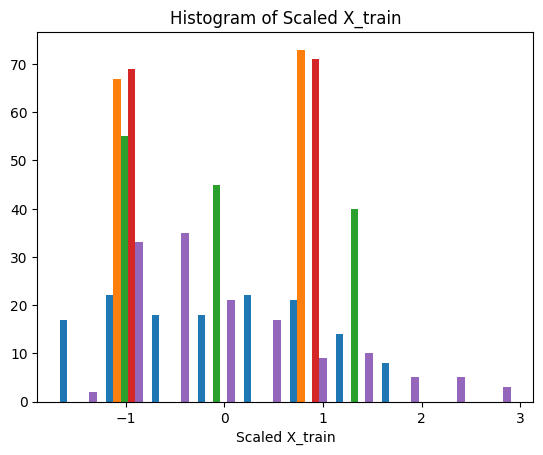

In [18]:
#visualise scaled data
# bar3 = X_train.value_counts().plot(kind='bar', figsize=(14,6))
# bar3.set_ylabel('Frequency')
# bar3.set_xlabel('Drug')
# bar3.set_title('A bar plot of single plot')

plt.hist(X_train)
plt.xlabel('Scaled X_train')
plt.title('Histogram of Scaled X_train')
plt.show()

Training a logistic regression classifier

In [19]:
# Fit a Logistic Regression model to the Training set
from sklearn.linear_model import LogisticRegression 
# fit training data to LogisticRegression()
log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Make predictions on the Test set
y_pred_23 = log_regression.predict(X_test)
y_pred_23

array([0, 1, 0, 3, 0, 0, 1, 0, 1, 1, 0, 0, 4, 3, 4, 0, 4, 4, 4, 4, 0, 4,
       0, 4, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 4, 0, 2, 0, 0, 0, 1, 1, 1, 0,
       4, 0, 1, 1, 0, 3, 1, 0, 0, 3, 0, 0, 4, 2, 2, 4])

In [21]:
#Training a Support vector machine classifier
from sklearn.svm import SVC
svcc = SVC()
svcc.fit(X_train, y_train)
# Make predictions on the Test set
y_2 = svcc.predict(X_test)
y_2

array([0, 1, 0, 3, 4, 0, 1, 0, 1, 1, 0, 0, 4, 3, 4, 0, 4, 4, 4, 4, 0, 4,
       0, 4, 4, 0, 3, 0, 0, 0, 4, 4, 0, 0, 4, 0, 2, 0, 3, 4, 1, 1, 1, 0,
       4, 0, 1, 2, 0, 3, 1, 0, 0, 3, 0, 0, 4, 2, 2, 4])

In [22]:
#Training a random forest classifier
from sklearn.ensemble import RandomForestClassifier
randomfc = RandomForestClassifier()
randomfc.fit(X_train, y_train)
# Make predictions on the Test set
y_3 = randomfc.predict(X_test)
y_3

array([0, 1, 0, 3, 0, 0, 1, 0, 1, 1, 0, 0, 4, 3, 4, 0, 4, 4, 0, 4, 0, 4,
       0, 4, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 4, 0, 2, 0, 3, 0, 1, 1, 1, 0,
       4, 0, 1, 1, 0, 3, 1, 0, 0, 3, 0, 0, 4, 2, 2, 0])